<a href="https://colab.research.google.com/github/TomoharuKurosu/Tomoharu_DS2/blob/main/LSTM%E3%80%80%E6%A0%AA%E4%BE%A1%E3%81%AE%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


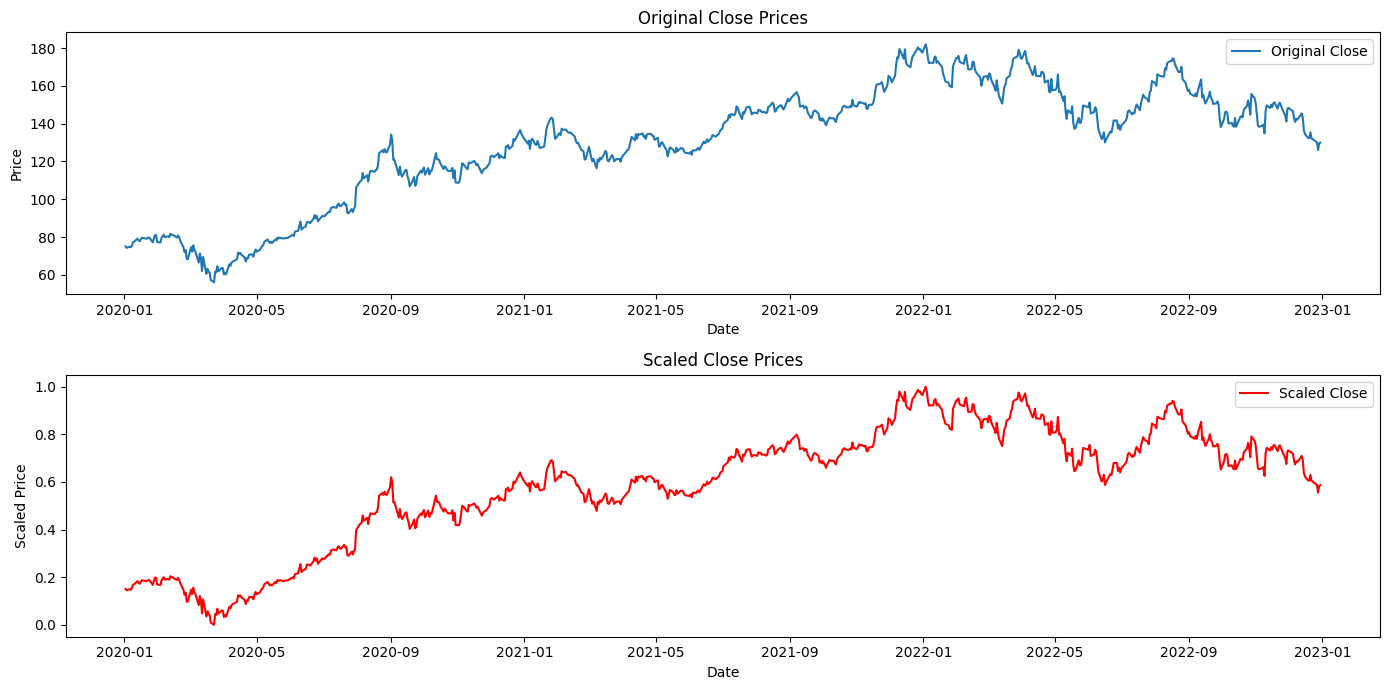

(543, 60, 1) (543,) (91, 60, 1) (91,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


543/543 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - loss: 0.0298
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[167.57000732 167.22999573 167.52999878 170.02999878 163.61999512
 161.38000488 158.91000366 157.22000122 157.96000671 155.80999756
 154.52999878 155.96000671 154.46000671 157.36999512 163.42999268
 153.83999634 155.30999756 152.36999512 150.69999695 154.47999573
 156.8999939  153.72000122 152.74000549 150.42999268 150.77000427
 151.75999451 149.83999634 142.47999573 138.19999695 142.44999695
 146.1000061  146.3999939  145.42999268 140.08999634 140.41999817
 138.97999573 138.33999634 142.99000549 138.38000488 142.41000366
 143.75       143.86000061 143.38999939 147.27000427 149.44999695
 152.33999634 149.3500061  144.80000305 155.74000549 153.33999634
 150.6499939  145.02999878 138.88000488 138.38000488 138.91999817
 139.5        134.86999512 146.86999512 149.69999695 148.27999878
 150.03999329 148.78999329 150.72000122 151.28999329 148.00999451
 150.1

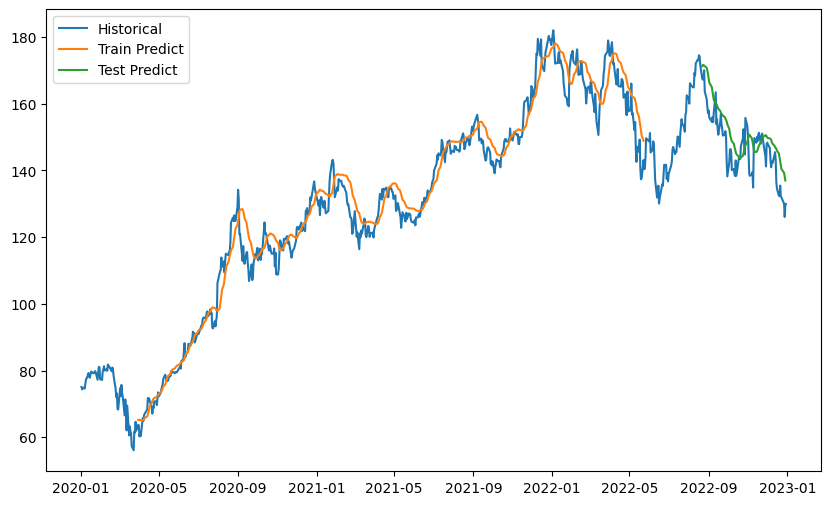

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #データを視覚化するためのライブラリ
import yfinance as yf #Yahoo Financeから株価データを取得するためのライブラリ
from sklearn.preprocessing import MinMaxScaler #はデータを正規化するためのクラスです。データを0から1の範囲にスケーリングして、異なる尺度を持つデータを均一にします。
from sklearn.metrics import mean_squared_error, r2_score #mean_squared_error (MSE): 実際の値と予測値の差の二乗平均を表し、誤差がどれくらい大きいかを示します。
#r2_score (決定係数): モデルがどれだけデータを説明できるかを評価する指標です。1に近いほど良いモデルです。
from tensorflow.keras.models import Sequential#Sequential は、ニューラルネットワークモデルを簡単に作成できるクラスです。モデルを順番に積み重ねる形で作成します。
from tensorflow.keras.layers import Dense, LSTM#Dense: 全結合層を作成するためのレイヤーです。通常、ニューラルネットワークの出力層や中間層として使います。
#LSTM: 長短期記憶（LSTM）層を作成するためのレイヤーで、時系列データや連続的なデータを扱うために使用されます。

# データの取得
ticker = 'AAPL' #ticker には、対象となる株式のシンボル（ティッカーシンボル）を指定します。この場合、"AAPL" は Apple Inc. のティッカーです。
data = yf.download(ticker, start='2020-01-01', end='2023-01-01') #Appleの株価データを2020年1月1日から2023年1月1日までの範囲で取得し、そのデータを data に格納します。
# カラムを確認してみる
data.columns

# Output: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
data = data["Close"]

# データの前処理
scaler = MinMaxScaler(feature_range=(0, 1)) #MinMaxScaler は、データを0から1の範囲にスケーリングするために使われるクラスです。feature_range=(0, 1) は、スケーリング後のデータの範囲を指定しており、この場合は0から1の範囲です。 学習効率アップ
data_scaled = scaler.fit_transform(np.array(data).reshape(-1, 1))#np.array(data): data は pandas.Series 形式なので、numpy の配列に変換します。これは、MinMaxScaler が numpy の配列形式でデータを受け取るためです。reshape(-1, 1): データを (n_samples, 1) の形状に変換しています。-1 は、自動的に元のデータのサイズに基づいて行数を設定し、1列の形に変換します。
#reshape 関数を使用して、配列の形状（次元）を変更する際に使われるパラメータです。
# 図で比較
plt.figure(figsize=(14, 7)) #図の作成と図の大きさの指定

# 正規化前のデータをプロット
plt.subplot(2, 1, 1)#結果として、2行1列のレイアウトの1番目の位置にプロットが描画されます。
plt.plot(data.index, data, label='Original Close')#この関数で、data.index を横軸（x軸）に、data を縦軸（y軸）にして折れ線グラフを描画します。
#data.index: この値は通常、日時データです（yfinance で取得したデータのインデックス）。
#data: Appleの株価の「Close（終値）」データです。
#また、label='Original Close' は凡例を設定します。
plt.title('Original Close Prices')#サブプロットのタイトル（上部に表示される見出し）を設定しています。
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()#グラフに凡例（ラベル）を表示します。ここで表示される凡例は、plt.plot() で指定した label='Original Close' に基づいています。

# 正規化後のデータをプロット
plt.subplot(2, 1, 2)#結果として、2行1列のレイアウトの2番目の位置にプロットが描画されます。
plt.plot(data.index, data_scaled, label='Scaled Close', color='red')
plt.title('Scaled Close Prices')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.legend()

# レイアウト調整
plt.tight_layout()#plt.tight_layout() は、グラフのレイアウト（プロット間の余白など）を自動的に調整して、各プロットやラベル、タイトルが重ならないように最適化します。
plt.show()#描画したグラフを画面に表示するためのコマンドです。これがないと、プロットを作成したとしても、グラフが表示されません。

# 訓練データとテストデータの分割
training_size = int(len(data_scaled) * 0.8)
#len(data_scaled)  data_scaled はスケーリングされたデータで、その長さ（データポイントの数）を取得します。たとえば、もしデータが1000ポイントあれば、len(data_scaled) は1000を返します。
#* 0.8データの80%を訓練データとして使います。0.8を掛けることで、全体の80%のサイズを計算しています。
#int()  計算結果を整数に変換します。データのインデックスは整数で扱われるため、小数点以下を切り捨てます。

train_data, test_data = data_scaled[:training_size], data_scaled[training_size:]
#data_scaled[:training_size] この部分は、data_scaled の最初から training_size 番目までのデータを取得します。具体的には、0番目のインデックスから training_size - 1 番目のインデックスまでのデータを含みます。
#この部分は、data_scaled の training_size 番目から最後までのデータを取得します。具体的には、training_size から最後のインデックスまでのデータを含みます。
# データをLSTM用に変換
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]#1列目（0列目）を選択しています。通常、データは2次元配列として格納されるため、列を指定します。
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)#X と Y を numpy 配列に変換して返します。
#time_step:各サンプルに対して使用する過去のデータポイント数（ウィンドウサイズ）。デフォルト値は1です。例えば、過去60日間のデータを使って予測を行いたい場合、time_step に60を指定します。
#X, Y = [], []　からリストの作成

#処理内容
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# LSTMの入力の形状を (samples, time_steps, features) に変換
#LSTM（Long Short-Term Memory）モデルは、3次元の入力データを期待します。具体的には、入力データは次のような形状でなければなりません：
#samples: サンプル数（訓練データやテストデータの数）
#time_steps: 各サンプルにおける時系列データのステップ数（過去のデータポイント数）
#features: 各ステップでの特徴量の数（通常は1つですが、複数の特徴量がある場合もあります）
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
#X_train.shape[0]: サンプル数です。例えば、X_train が (100, 60) の形状であれば、X_train.shape[0] は100になります。
#X_train.shape[1]: 時系列データのステップ数（time_step）。例えば、X_train が (100, 60) の形状であれば、X_train.shape[1] は60です。
#1: 特徴量の数です。ここでは、1つの特徴量（スケーリングされた価格データ）を使用しています。
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# LSTMモデルの構築
model = Sequential()#目的: Kerasのモデルを初期化します。Sequential モデルは、層が順に積み重ねられる単純なモデルの形態です。
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
#model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))  目的: LSTM層を追加します。この層は、時系列データを処理するために使います。LSTM(50): 50ユニット（ノード）を持つLSTM層を追加します。ユニット数は、モデルが学習するパラメータの数や能力を決定します。
#return_sequences=True: このオプションは、LSTM層が各タイムステップの出力を返すようにします。これにより、次のLSTM層が時系列の全体を考慮に入れられます。
#input_shape=(time_step, 1): 入力データの形状を指定します。time_step は過去のデータポイント数、1 は特徴量の数です。
model.add(LSTM(50, return_sequences=False))
#このオプションは、LSTM層が最後のタイムステップの出力だけを返すようにします。これは、次に追加する全結合層（Dense層）が入力を扱いやすくするためです。

model.add(Dense(25))#目的: 全結合層（Dense層）を追加します。Dense層は、各ユニットが前の層のすべてのユニットに接続される層です。
#Dense(25): 25ユニットを持つDense層を追加します。この層は、LSTM層の出力を受け取り、より高次の特徴を学習するために使用されます。
model.add(Dense(1))#目的: 出力層を追加します。この層は、モデルの最終的な予測結果を出力します。
#Dense(1): 1ユニットを持つDense層を追加します。これは回帰問題（価格予測など）で、1つの連続値を出力するために使います。

# モデルのコンパイルと訓練
model.compile(optimizer='adam', loss='mean_squared_error')#Adamは、適応的な学習率を用いた最適化アルゴリズムで、広く使用されている手法です。勾配降下法のバリエーションであり、一般的に良い性能を発揮します。
#損失関数として平均二乗誤差（MSE）を指定しています。MSEは、予測値と実際の値の差の二乗を平均したもので、回帰問題でよく使用されます。
model.fit(X_train, y_train, batch_size=1, epochs=1)
#batch_size=1:説明: ミニバッチ学習のサイズです。ここではバッチサイズを1に設定しています。つまり、モデルは各訓練サンプルごとに重みを更新します。
#batch_size=1:説明: ミニバッチ学習のサイズです。ここではバッチサイズを1に設定しています。つまり、モデルは各訓練サンプルごとに重みを更新します。

# 予測
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 予測結果を逆変換
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# モデルの評価
mse = mean_squared_error(y_test[0], test_predict[:, 0])
r2 = r2_score(y_test[0], test_predict[:, 0])
print(y_test[0])
print(test_predict[:, 0])

print('MSE: {:.2f}'.format(mse))
print('R^2: {:.2f}'.format(r2))

# Output
# MSE: 87.30
# R^2: -0.08

# プロット
plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Historical')#元のデータ（data）をプロットします。x軸data.index は日付、y軸data は価格です。
train_predict_plot = np.empty_like(data_scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict
#train_predict の予測結果を、train_predict_plot 配列の指定した位置に配置します。time_step から始めて、len(train_predict) + time_step までの範囲に予測値を挿入します。
plt.plot(data.index, train_predict_plot, label='Train Predict')

test_predict_plot = np.empty_like(data_scaled)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2) + 1:len(data_scaled) - 1, :] = test_predict
plt.plot(data.index, test_predict_plot, label='Test Predict')

plt.legend()
plt.show()
